# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

# Solution
`n_estimator` is the number of trees in a forest. The performance of the forest is increasing in the number of trees. However, this increase comes at the cost of computational power.   

`max_depth` is the maximal depth of the trees i.e. the number of splits in a tree. If this number is too low, the tree is likely to underfit. If the `max_depth` is too high, the tree is overfitting. 

`max_features` is the number of features that is evaluated for setting the splits. While `max_depth` gives the number of splits, `max_features` influences how these splits are constructed. If it is set too low, the trees are weaker. However, the correlation between trees will be lower. On the other hand, if the value is too high the forest will be weaker (higher correlation between trees), but the trees will be stronger.

`bootstrap` determines whether the data will be drawn with replacement or not. If set to `True`, the correlation between the trees will be reduced. If the option is set to `False`, there is a risk that the trees will look very similar.

> **Ex. 2.1.2**: For `n_estimators > 1` how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

`max_features` should be set to `n_features` and bootstrap to `False`. This way, the random forest classifier will always only evaluate the whole feature set and use the complete data. In all the trees, the  will select the splits according to the features with the highest predictive power. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

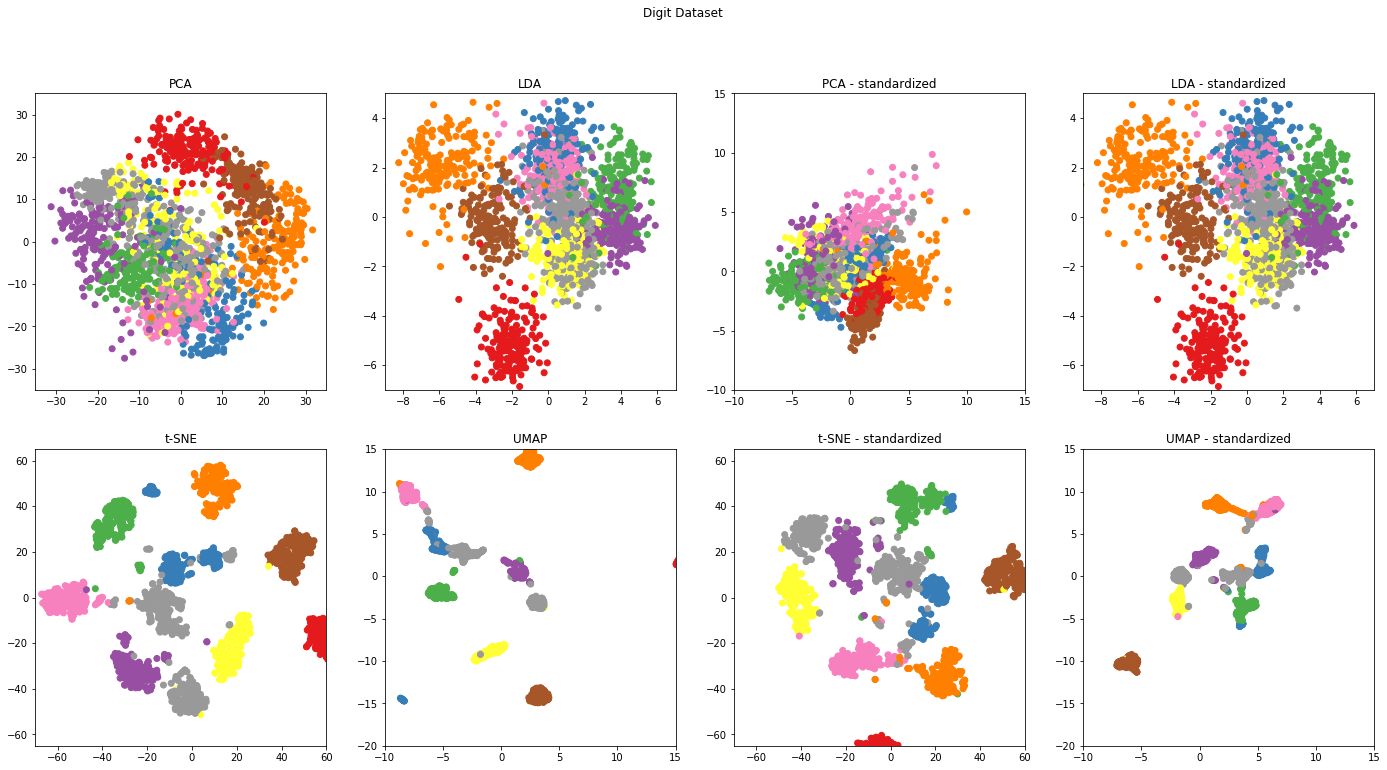

In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

ssc = StandardScaler()
pca = PCA()
lda = LinearDiscriminantAnalysis()
tsne = TSNE()
umap = UMAP()

#digit_data
#uncomment for comparison
#X_digits_std = ssc.fit_transform(X_digits) 
#Note: The dataset is already on the same scale.
X_digits_std = X_digits
X_pca = pca.fit_transform(X_digits_std)
X_pca1,X_pca2  = X_pca[:, 0], X_pca[:, 1]

X_lda = lda.fit_transform(X_digits_std, y_digits)
X_lda1,X_lda2  = X_lda[:, 0], X_lda[:, 1]

X_tsne = tsne.fit_transform(X_digits_std)
X_tsne1,X_tsne2  = X_tsne[:, 0], X_tsne[:, 1]

X_umap = umap.fit_transform(X_digits_std)
X_umap1,X_umap2  = X_umap[:, 0], X_umap[:, 1]

fig, axs = plt.subplots(2, 4,  figsize = (24,12))
fig.suptitle("Digit Dataset")
axs[0,0].set(xlim=(-35, 35), ylim=(-35, 35))
axs[0,0].set_title("PCA")
axs[0,1].set(xlim=(-9, 7), ylim=(-7, 5))
axs[0,1].set_title("LDA")
axs[1,0].set(xlim=(-70, 60), ylim=(-65, 65))
axs[1,0].set_title("t-SNE")
axs[1,1].set(xlim=(-10, 15), ylim=(-20, 15))
axs[1,1].set_title("UMAP")

axs[0,2].set(xlim=(-10, 15), ylim=(-10, 15))
axs[0,2].set_title("PCA - standardized")
axs[0,3].set(xlim=(-9, 7), ylim=(-7, 5))
axs[0,3].set_title("LDA - standardized")
axs[1,2].set(xlim=(-70, 60), ylim=(-65, 65))
axs[1,2].set_title("t-SNE - standardized")
axs[1,3].set(xlim=(-10, 15) , ylim=(-20, 15))
axs[1,3].set_title("UMAP - standardized")

X_digits_std = ssc.fit_transform(X_digits)
X_pca = pca.fit_transform(X_digits_std)
X_pca3,X_pca4  = X_pca[:, 0], X_pca[:, 1]

X_lda = lda.fit_transform(X_digits_std, y_digits)
X_lda3,X_lda4  = X_lda[:, 0], X_lda[:, 1]

X_tsne = tsne.fit_transform(X_digits_std)
X_tsne3,X_tsne4  = X_tsne[:, 0], X_tsne[:, 1]

X_umap = umap.fit_transform(X_digits_std)
X_umap3,X_umap4  = X_umap[:, 0], X_umap[:, 1]

axs[0,0].scatter(X_pca1, X_pca2, c=y_digits,cmap='Set1')
axs[0,1].scatter(X_lda1, X_lda2, c=y_digits, cmap='Set1')
axs[1,0].scatter(X_tsne1, X_tsne2, c=y_digits, cmap='Set1')
axs[1,1].scatter(X_umap1, X_umap2, c=y_digits, cmap='Set1')
axs[0,2].scatter(X_pca3, X_pca4, c=y_digits,cmap='Set1')
axs[0,3].scatter(X_lda3, X_lda4, c=y_digits, cmap='Set1')
axs[1,2].scatter(X_tsne3, X_tsne4, c=y_digits, cmap='Set1')
axs[1,3].scatter(X_umap3, X_umap4, c=y_digits, cmap='Set1')


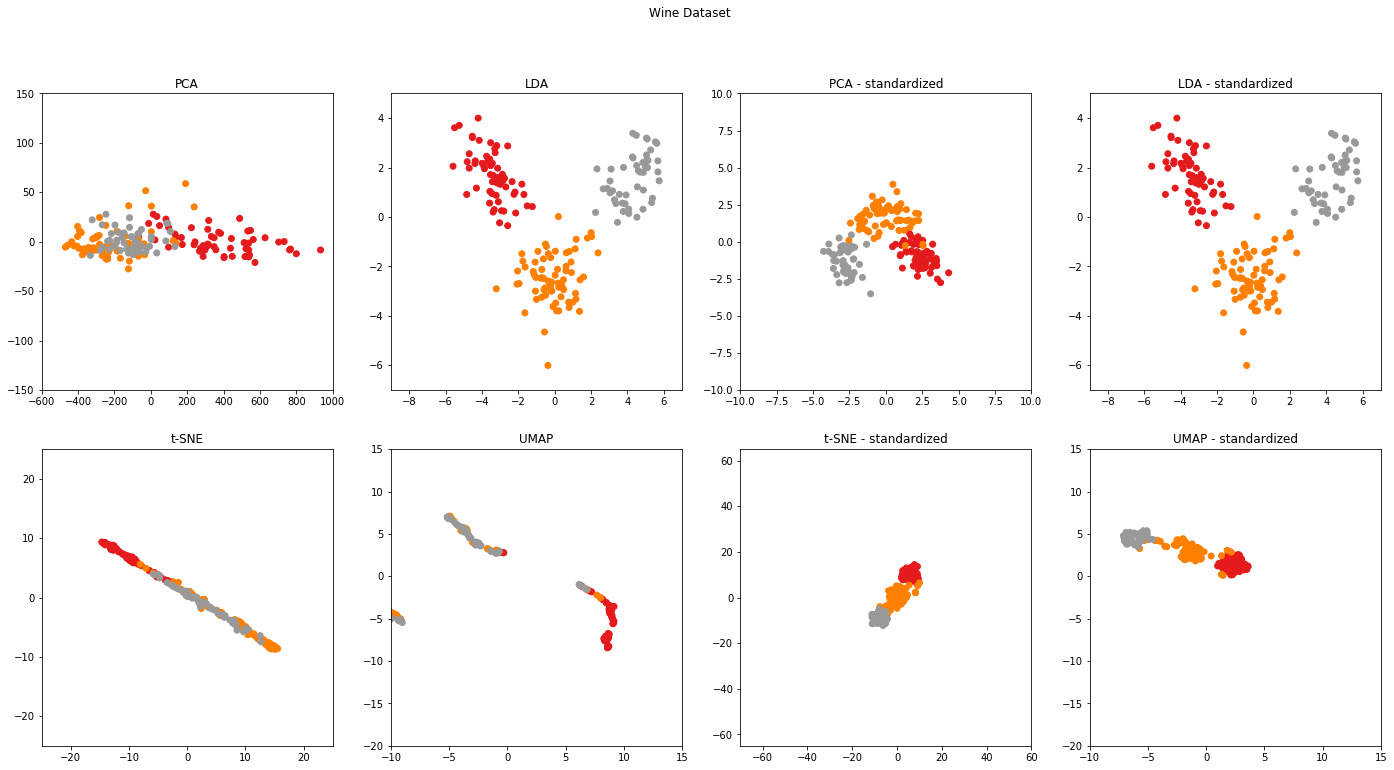

In [15]:
#Wine dataset
X_wine_std = X_wine 
X_pca = pca.fit_transform(X_wine_std)
X_pca1,X_pca2  = X_pca[:, 0], X_pca[:, 1]

X_lda = lda.fit_transform(X_wine_std, y_wine)
X_lda1,X_lda2  = X_lda[:, 0], X_lda[:, 1]

X_tsne = tsne.fit_transform(X_wine_std)
X_tsne1,X_tsne2  = X_tsne[:, 0], X_tsne[:, 1]

X_umap = umap.fit_transform(X_wine_std)
X_umap1,X_umap2  = X_umap[:, 0], X_umap[:, 1]

X_wine_std = ssc.fit_transform(X_wine)
X_pca = pca.fit_transform(X_wine_std)
X_pca3,X_pca4  = X_pca[:, 0], X_pca[:, 1]

X_lda = lda.fit_transform(X_wine_std, y_wine)
X_lda3,X_lda4  = X_lda[:, 0], X_lda[:, 1]

X_tsne = tsne.fit_transform(X_wine_std)
X_tsne3,X_tsne4  = X_tsne[:, 0], X_tsne[:, 1]

X_umap = umap.fit_transform(X_wine_std)
X_umap3,X_umap4  = X_umap[:, 0], X_umap[:, 1]

fig, axs = plt.subplots(2, 4,  figsize = (24,12))
fig.suptitle("Wine Dataset")
axs[0,0].set(xlim=(-600, 1000), ylim=(-150, 150))
axs[0,0].set_title("PCA")
axs[0,1].set(xlim=(-9, 7), ylim=(-7, 5))
axs[0,1].set_title("LDA")
axs[1,0].set(xlim=(-25, 25), ylim=(-25, 25))
axs[1,0].set_title("t-SNE")
axs[1,1].set(xlim=(-10, 15), ylim=(-20, 15))
axs[1,1].set_title("UMAP")

axs[0,2].set(xlim=(-10, 10), ylim=(-10, 10))
axs[0,2].set_title("PCA - standardized")
axs[0,3].set(xlim=(-9, 7), ylim=(-7, 5))
axs[0,3].set_title("LDA - standardized")
axs[1,2].set(xlim=(-70, 60), ylim=(-65, 65))
axs[1,2].set_title("t-SNE - standardized")
axs[1,3].set(xlim=(-10, 15) , ylim=(-20, 15))
axs[1,3].set_title("UMAP - standardized")


axs[0,0].scatter(X_pca1, X_pca2, c=y_wine,cmap='Set1')
axs[0,1].scatter(X_lda1, X_lda2, c=y_wine, cmap='Set1')
axs[1,0].scatter(X_tsne1, X_tsne2, c=y_wine, cmap='Set1')
axs[1,1].scatter(X_umap1, X_umap2, c=y_wine, cmap='Set1')
axs[0,2].scatter(X_pca3, X_pca4, c=y_wine,cmap='Set1')
axs[0,3].scatter(X_lda3, X_lda4, c=y_wine, cmap='Set1')
axs[1,2].scatter(X_tsne3, X_tsne4, c=y_wine, cmap='Set1')
axs[1,3].scatter(X_umap3, X_umap4, c=y_wine, cmap='Set1')



The features of the digit dataset are already measured on the same scale. Hence, the reducers do a good job in the unstandardized dataset. However, the features in wine dataset are measured on different scales. The reducers try to find the direction with the largest variance. If the features are measured on different scales, the reducers will instead focus on the features with the largest scales. 

In the case of the LDA, there is no need for standardization. This is best explained [here](https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step).

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

Honesty means that the dataset is divided into a training and an estimation set. The training set is used to construct the tree. The estimation set is then used to estimate the treatment effect in every leaf (subpopulation). This way, there is no data leakage that would result in overfitting. 